In [236]:
!pip install chart-studio

In [237]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
%matplotlib inline

In [238]:
df = pd.read_csv('911.csv')

In [239]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [241]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


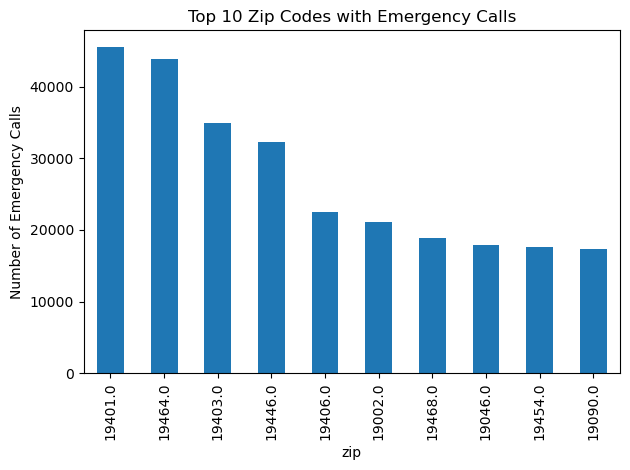

In [242]:
#Top 10 zip codes according to number of calls
df.groupby('zip')['title'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of Emergency Calls')
plt.title('Top 10 Zip Codes with Emergency Calls')
plt.tight_layout()
plt.show()


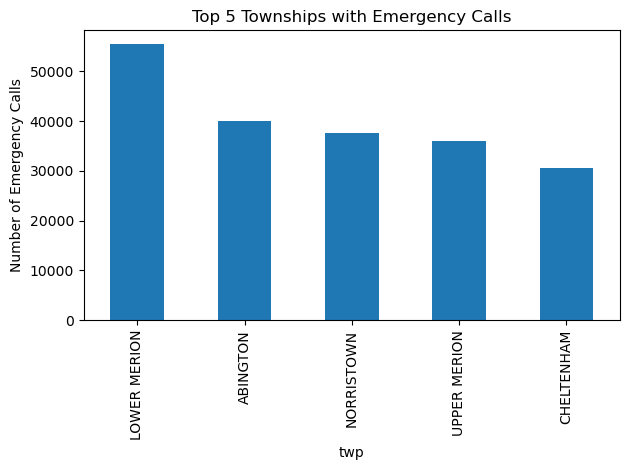

In [243]:
#Top 5 townships according to number of calls
df.groupby('twp')['title'].count().sort_values(ascending=False).head(5).plot(kind='bar')
plt.ylabel('Number of Emergency Calls')
plt.title('Top 5 Townships with Emergency Calls')
plt.tight_layout()
plt.show()

In [244]:
#From the above Graph we can say that most of the calls to 911 are made from Lower Merion Town

In [245]:

'''In title column , we have reasons to call 911 like EMS=Emergencey, Traffic=Due to Accident, Fire=Due to Gas leakeage etc. 
So, we can anaylse the reasons by separating title column and creating a new column'''

df['title']

0              EMS: BACK PAINS/INJURY
1             EMS: DIABETIC EMERGENCY
2                 Fire: GAS-ODOR/LEAK
3              EMS: CARDIAC EMERGENCY
4                      EMS: DIZZINESS
                     ...             
663517    Traffic: VEHICLE ACCIDENT -
663518          EMS: GENERAL WEAKNESS
663519          EMS: VEHICLE ACCIDENT
663520            Fire: BUILDING FIRE
663521    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 663522, dtype: object

In [246]:
df['reason'] = df.apply(lambda x: (x['title'].split(":")[0]),axis=1)

In [247]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

In [248]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'reason'],
      dtype='object')

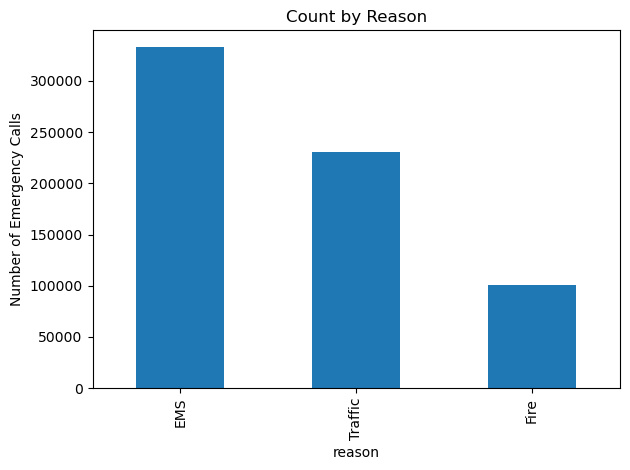

In [249]:
df.groupby('reason')['title'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Emergency Calls')
plt.title('Count by Reason')
plt.tight_layout()
plt.show()


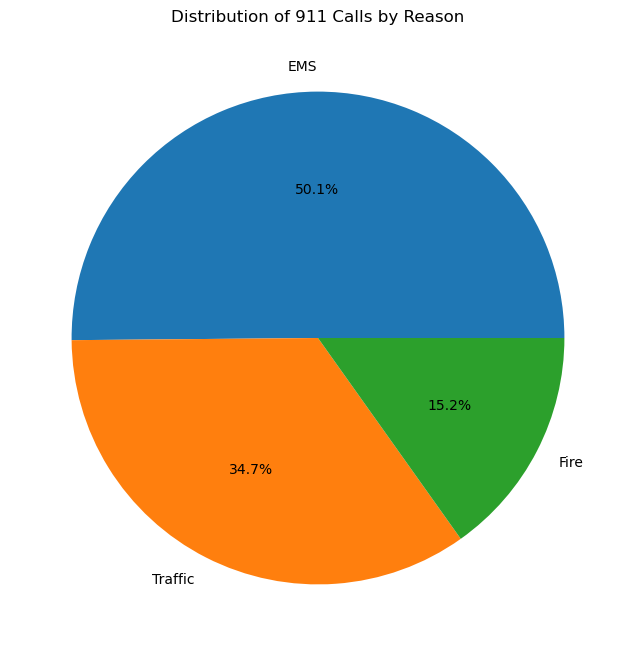

The pie chart reveals how 911 calls are distributed by reason, showcasing the roles of categories like EMS, fire, and traffic incidents. By displaying the percentages, it gives us a quick look at which reasons are most common, adding depth to our understanding alongside the total counts shown in other graphs. This helps us spot key trends and gain a better grasp of the data.


In [311]:
reason_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of 911 Calls by Reason')
plt.ylabel('')
plt.show()
print("The pie chart reveals how 911 calls are distributed by reason, showcasing the roles of categories like EMS, fire, and traffic incidents. By displaying the percentages, it gives us a quick look at which reasons are most common, adding depth to our understanding alongside the total counts shown in other graphs. This helps us spot key trends and gain a better grasp of the data.")

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

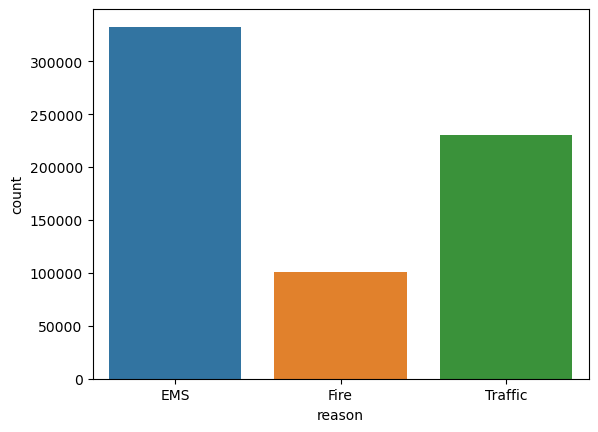

In [312]:
sns.countplot(x=df['reason'])
plt.tight_layout

In [251]:
df.apply(lambda x:x['title'].split(':')[0],axis=1)

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Length: 663522, dtype: object

In [252]:
df_EMS = df[df.apply(lambda x: 'EMS' in x['title'], axis=1)]

In [253]:
df_EMS

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
...,...,...,...,...,...,...,...,...,...,...
663509,40.193281,-75.529438,TOWNSHIP LINE RD & 10TH AVE; LIMERICK; Statio...,19468.0,EMS: SYNCOPAL EPISODE,2020-07-29 15:34:31,LIMERICK,TOWNSHIP LINE RD & 10TH AVE,1,EMS
663511,40.079830,-75.134054,IVY LN & WIDENER RD; CHELTENHAM; Station 358;...,19027.0,EMS: RESPIRATORY EMERGENCY,2020-07-29 15:33:34,CHELTENHAM,IVY LN & WIDENER RD,1,EMS
663512,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: FALL VICTIM,2020-07-29 15:33:09,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,EMS
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS


In [254]:
x = df_EMS.apply(lambda x:x['title'].split(':')[1].strip(),axis=1)

In [255]:
x

0             BACK PAINS/INJURY
1            DIABETIC EMERGENCY
3             CARDIAC EMERGENCY
4                     DIZZINESS
5                   HEAD INJURY
                  ...          
663509         SYNCOPAL EPISODE
663511    RESPIRATORY EMERGENCY
663512              FALL VICTIM
663518         GENERAL WEAKNESS
663519         VEHICLE ACCIDENT
Length: 332700, dtype: object

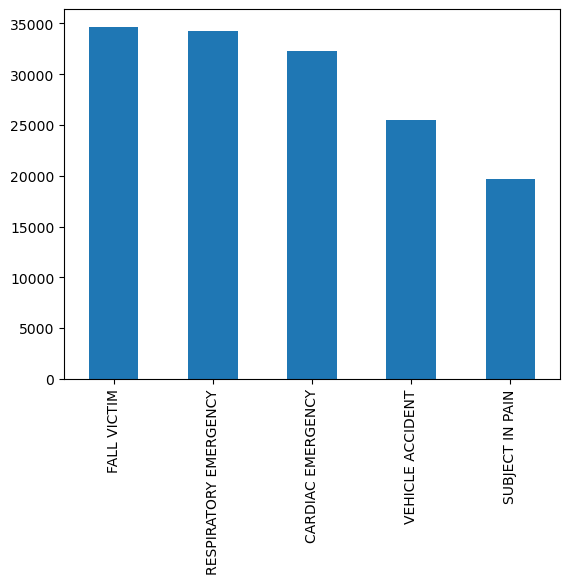

If we explore more about emergeny calls.Fall Victim, Respiratory Emergency and Cardiac Emergency constitue its major part


In [256]:
x.value_counts().head().plot(kind='bar')
plt.tight_layout
plt.show()
print("If we explore more about emergeny calls.Fall Victim, Respiratory Emergency and Cardiac Emergency constitue its major part")

In [257]:
df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'reason'],
      dtype='object')

In [258]:
df.index

RangeIndex(start=0, stop=663522, step=1)

In [259]:
type(df.loc[0,'timeStamp'])

str

In [260]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [261]:
type(df.loc[0,'timeStamp'])


pandas._libs.tslibs.timestamps.Timestamp

In [262]:
df.loc[0,'timeStamp'].hour

17

In [263]:
df['hour'] = df.apply(lambda x:x['timeStamp'].hour,axis=1)

In [264]:
df['hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: hour, Length: 663522, dtype: int64

In [265]:
df['month']= df.apply(lambda x:x['timeStamp'].month,axis=1)

In [266]:
df['month']

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: month, Length: 663522, dtype: int64

In [267]:
df['Day of Week'] = df.apply(lambda x:x['timeStamp'].dayofweek,axis=1)

In [268]:
df['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [269]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [270]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [271]:
df['Day of Week'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

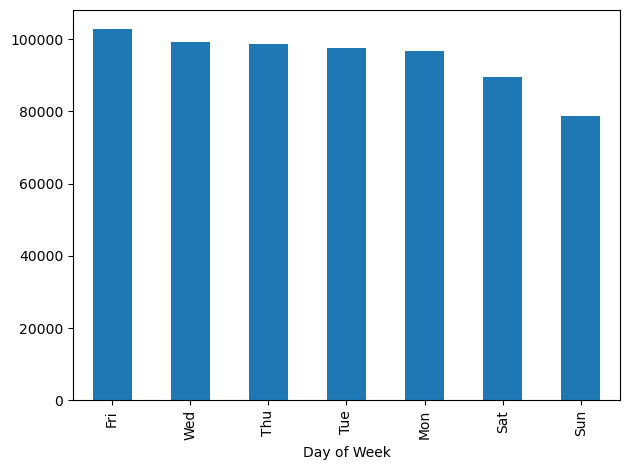

This graph suggests that emergency services experience greater demand on weekdays, while weekends see a relative decrease, possibly due to fewer work-related incidents and a more relaxed schedule for many people


In [272]:
df['Day of Week'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()
print("This graph suggests that emergency services experience greater demand on weekdays, while weekends see a relative decrease, possibly due to fewer work-related incidents and a more relaxed schedule for many people")



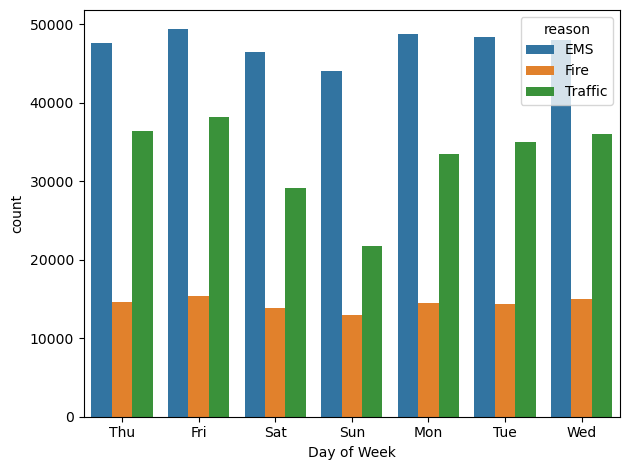

This graph displays the distribution of 911 calls across the days of the week, categorized by reasons. It highlights that EMS accounts for the highest number of calls, while Fire represents the lowest.


In [273]:
sns.countplot(x='Day of Week', hue='reason', data=df)
plt.tight_layout()
plt.show()
print("This graph displays the distribution of 911 calls across the days of the week, categorized by reasons. It highlights that EMS accounts for the highest number of calls, while Fire represents the lowest.")

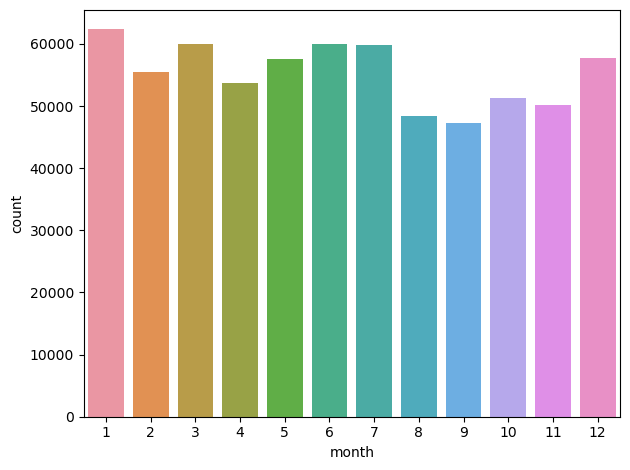

This graph illustrates the monthly distribution of 911 calls, showing that January had the highest number of calls.


In [274]:
sns.countplot(x=df['month'])
plt.tight_layout()
plt.show()
print("This graph illustrates the monthly distribution of 911 calls, showing that January had the highest number of calls.")



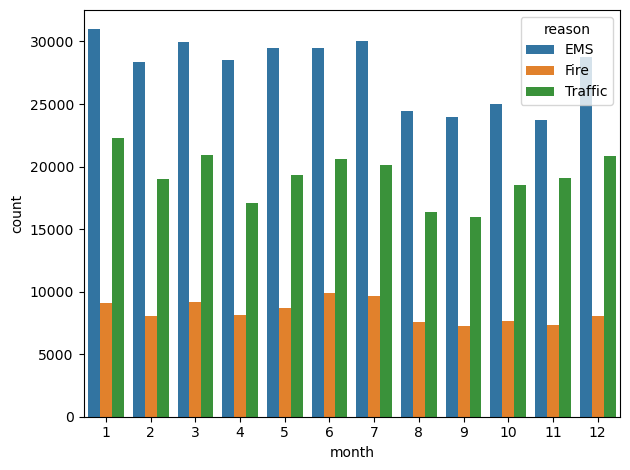

This graph shows how 911 calls are distributed by day of the month and reason, with January having the most calls, mainly from EMS, as well as higher fire and traffic incidents. 


In [275]:
sns.countplot(x='month', hue='reason', data=df)
plt.tight_layout()
plt.show()
print("This graph shows how 911 calls are distributed by day of the month and reason, with January having the most calls, mainly from EMS, as well as higher fire and traffic incidents. ")

In [276]:
by_Month=df.groupby('month').count()
by_Month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Day of Week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


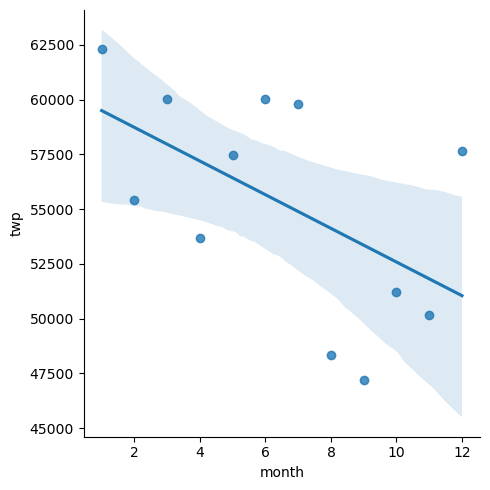

In [279]:
sns.lmplot(x='month',y='twp',data=by_Month.reset_index('month'))

In [286]:
df['Date'] = df.apply(lambda x:x['timeStamp'].date(),axis=1)

In [287]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

In [288]:
dayHour=df.groupby(by=['Day of Week','hour']).count()['reason'].unstack()

In [289]:
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


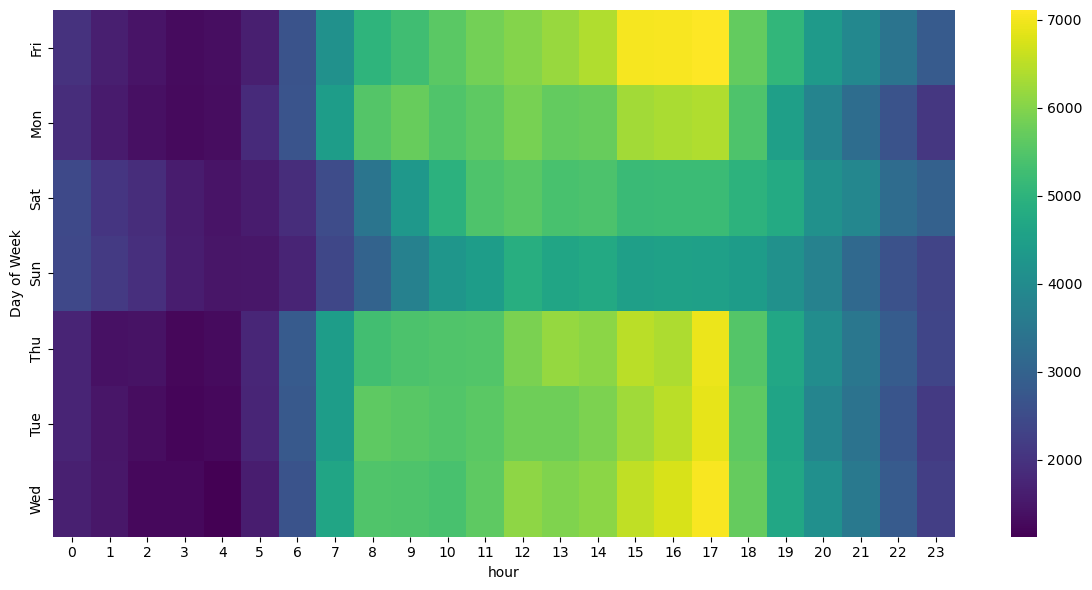

After plotting heatmap of relationship between number of calls made and hour. we see a particular pattern. frequency of calls made between 0 to 6 hours are less compared to other hours. That may be because most of the people are asleep 


In [290]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
plt.tight_layout()
plt.show()
print("After plotting heatmap of relationship between number of calls made and hour. we see a particular pattern. frequency of calls made between 0 to 6 hours are less compared to other hours. That may be because most of the people are asleep ")

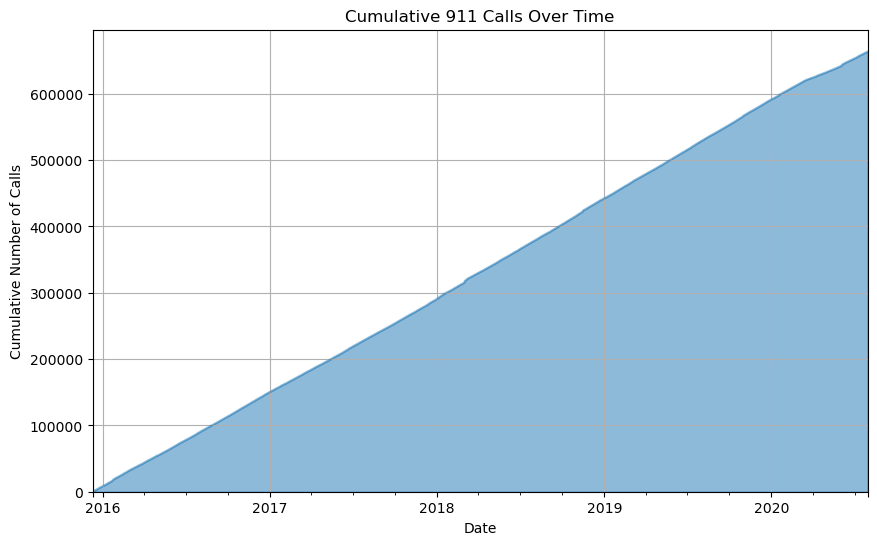

The cumulative area chart shows the total number of 911 calls over time, highlighting the steady increase in call volume. It allows us to easily spot key moments of high activity and gives a broader view of how emergencies have evolved. This perspective adds depth to our understanding of trends in emergency calls.


In [315]:
df.groupby('Date')['title'].count().cumsum().plot(kind='area', figsize=(10, 6), alpha=0.5)
plt.title('Cumulative 911 Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Calls')
plt.grid()
plt.show()
print("The cumulative area chart shows the total number of 911 calls over time, highlighting the steady increase in call volume. It allows us to easily spot key moments of high activity and gives a broader view of how emergencies have evolved. This perspective adds depth to our understanding of trends in emergency calls.")

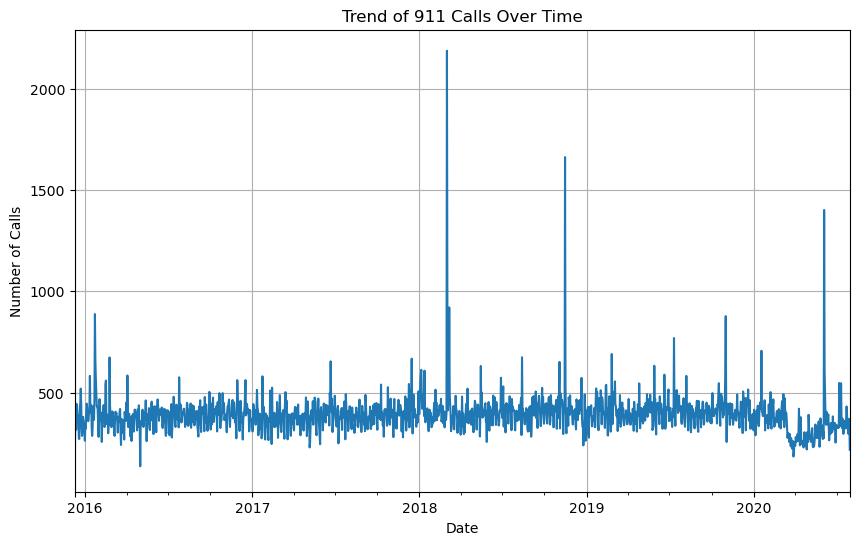

The line plot shows the trend of 911 calls over time, revealing spikes and dips in emergency call volume.These fluctuations might reflect specific events or seasonal patterns


In [314]:
plt.figure(figsize=(10, 6))
df.groupby('Date')['title'].count().plot(kind='line')
plt.title('Trend of 911 Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid()
plt.show()
print("The line plot shows the trend of 911 calls over time, revealing spikes and dips in emergency call volume.These fluctuations might reflect specific events or seasonal patterns")

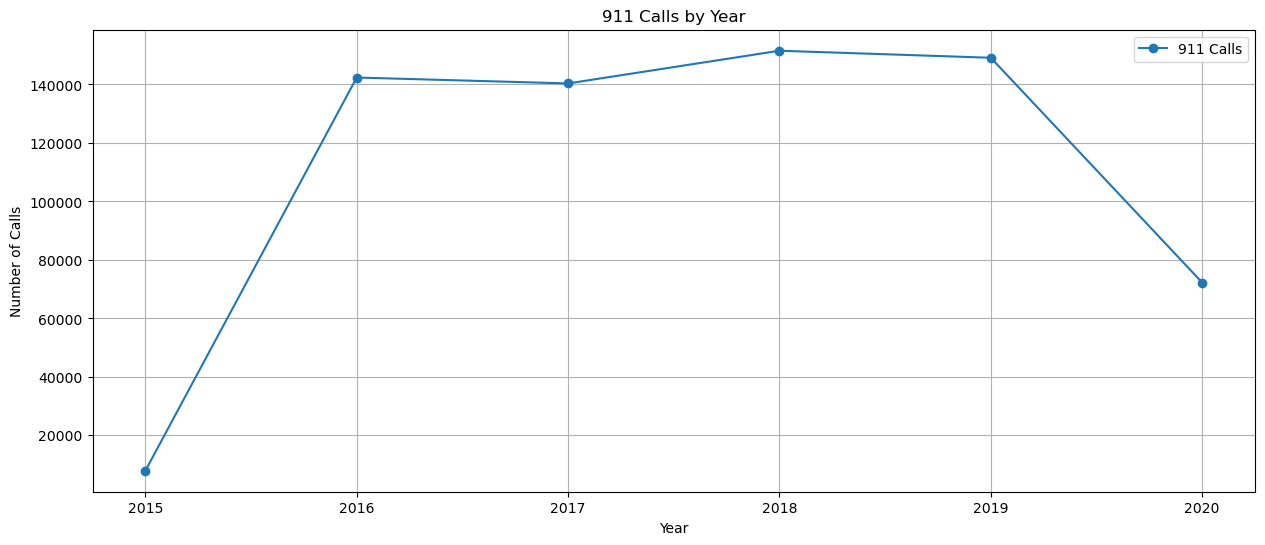

The year-wise analysis shows a steady increase in cases until 2018, followed by a slowdown in 2019 and significant fluctuations in 2020 up to June. This may be due to changes in population dynamics, improvements in emergency response services, and external events like public health emergencies or policy changes.


In [297]:

df['Date'] = pd.to_datetime(df['Date'])
# Group the data by year and count the occurrences of 'title'
plt.figure(figsize=(15, 6))
df.groupby(df['Date'].dt.year)['title'].count().plot(kind='line', marker='o', label='911 Calls')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.title('911 Calls by Year')
plt.xticks(df['Date'].dt.year.unique())  # Use unique years in the dataset for x-ticks
plt.grid(True)
plt.legend()

# Display the plot
plt.show()
print("The year-wise analysis shows a steady increase in cases until 2018, followed by a slowdown in 2019 and significant fluctuations in 2020 up to June. This may be due to changes in population dynamics, improvements in emergency response services, and external events like public health emergencies or policy changes.")


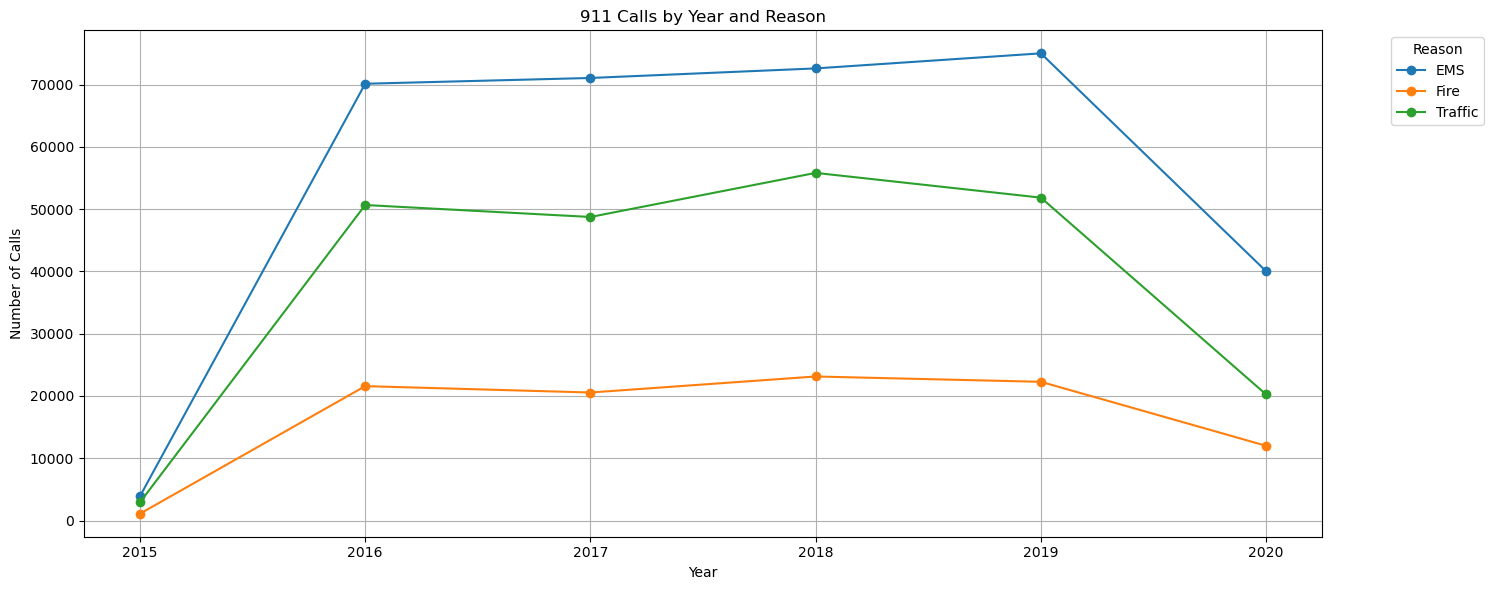

This graph reveals a steady rise in 911 calls for Emergency Medical Services (EMS) until 2019, while calls related to fire and traffic incidents showed significant fluctuations. This trend underscores the need for enhanced monitoring and resources for EMS, in contrast to the variable demands of fire and traffic responses.


In [299]:

# Step 1: Group by year and reason, counting the number of calls
calls_by_year_reason = df.groupby(['year', 'reason'])['title'].count().unstack(fill_value=0)

# Step 2: Create a line plot for each reason
plt.figure(figsize=(15, 6))
for reason in calls_by_year_reason.columns:
    plt.plot(calls_by_year_reason.index, calls_by_year_reason[reason], marker='o', label=reason)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.title('911 Calls by Year and Reason')
plt.xticks(calls_by_year_reason.index)  # Use unique years in the dataset for x-ticks
plt.grid(True)
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

# Display the plot
plt.tight_layout()
plt.show()
print("This graph reveals a steady rise in 911 calls for Emergency Medical Services (EMS) until 2019, while calls related to fire and traffic incidents showed significant fluctuations. This trend underscores the need for enhanced monitoring and resources for EMS, in contrast to the variable demands of fire and traffic responses.")

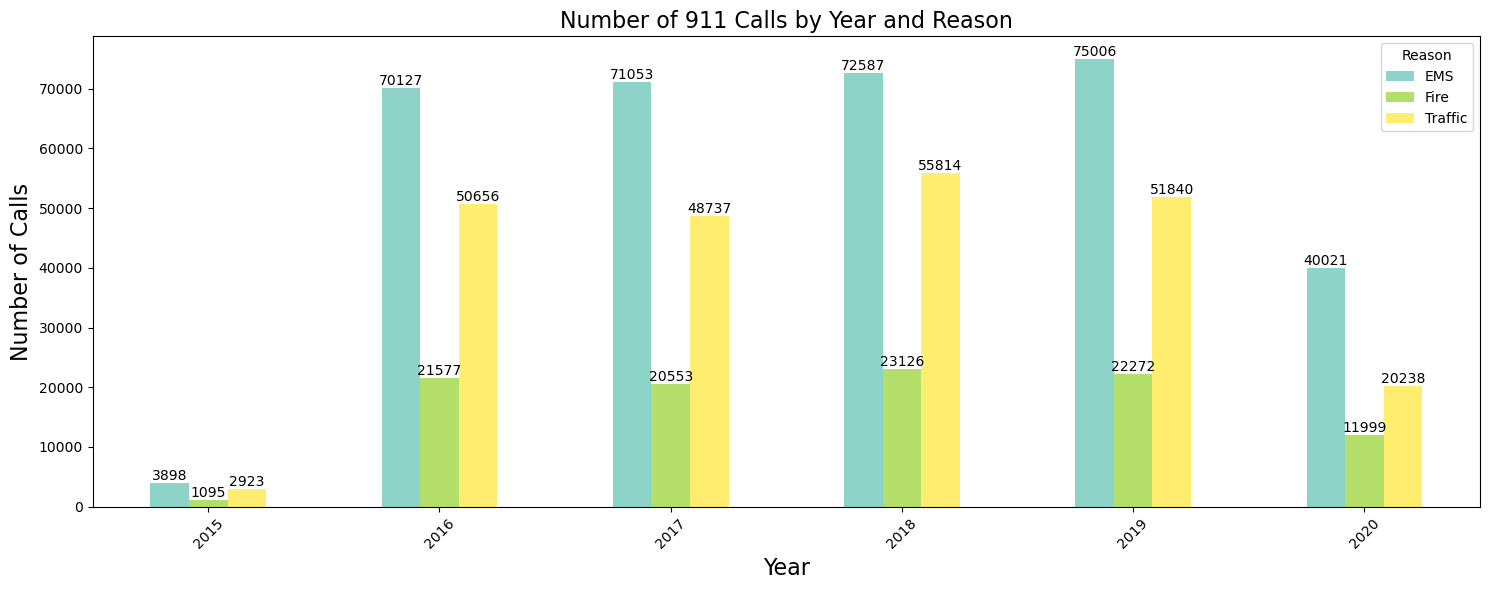

This bar graph enhances our understanding of 911 call data by presenting it in a year-wise breakdown, allowing us to see not just the trends but also the specific factors contributing to those trends. The clear labeling of each bar adds to the clarity of the data, making it easier to communicate findings to stakeholders.


In [307]:
# Step 1: Group by year and reason, counting the number of calls
calls_by_year_reason = df.groupby(['year', 'reason'])['title'].count().unstack(fill_value=0)

# Step 2: Create a bar plot
ax = calls_by_year_reason.plot(kind='bar', figsize=(15, 6), stacked=False, colormap='Set3')

# Add labels, title, and legend
plt.title('Number of 911 Calls by Year and Reason', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Calls', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Reason')

# Step 3: Add the number of calls as labels on top of the bars
for p in ax.patches:  # Iterate through the patches (bars)
    ax.annotate(str(int(p.get_height())),  # Get the height of the bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the label
                ha='center', va='bottom', fontsize=10)  # Center align and place above the bar

plt.tight_layout()
plt.show()

print("This bar graph enhances our understanding of 911 call data by presenting it in a year-wise breakdown, allowing us to see not just the trends but also the specific factors contributing to those trends. The clear labeling of each bar adds to the clarity of the data, making it easier to communicate findings to stakeholders.")





